# Marginals, Theoretical

In [2]:
import sys
sys.path.insert(0, '../../src/')

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random

from tqdm.notebook import tqdm
from qiskit.quantum_info import Operator

from quantum_circuits import integrable_circuit, haar_random
from kraus_channels import isomery_to_kraus
from utils import saver, loader
from spectrum import complex_spacing_ratio, channel_spectrum, Spectrum
from analysis import spectrum_to_angular, spectrum_to_radial, hist_ensamble

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

## Circuits

In [3]:
def sample_csr(n, reps, circuit_type, L):

    d = 2**n

    map_list = []
    spectra_list = []
    csr_list = []
    for _ in tqdm(range(reps)):
        circuit = circuit_type(n+1, L)
        U = Operator(circuit).data
        kraus_map = isomery_to_kraus(U, rank = 2)

        map_list.append(kraus_map)
        
        spectrum = channel_spectrum(kraus_map)
        spectra_list.append(spectrum)
        csr = complex_spacing_ratio(spectrum, log=False)
        csr_list.append(csr)

    return  map_list, spectra_list, csr_list
    
def moving_average(data, window_size):
    half_window = window_size // 2
    smoothed_data = np.zeros_like(data, dtype=float)
    
    for i in range(len(data)):
        # Define window edges with proper handling at boundaries
        start = max(0, i - half_window)
        end = min(len(data), i + half_window + 1)
        
        # Compute the average over the dynamically sized window
        smoothed_data[i] = np.mean(data[start:end])
    
    return smoothed_data

## Integrable

In [ ]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

n = 4
d = 2**n
reps = 100000

maps_integrable_list, spectra_integrable_list, csr_integrable_list = sample_csr(n, reps, integrable_circuit, 100)

csr_integrable = Spectrum(csr_integrable_list)
radial_integrable_list = spectrum_to_radial(csr_integrable_list)
angular_integrable_list = spectrum_to_angular(csr_integrable_list)

saver([radial_integrable_list, angular_integrable_list], 'data/FF_marginals_raw.pkl')
    

### Radial and Angular

In [4]:
[radial_integrable_list, angular_integrable_list] = loader('data/FF_marginals_raw.large')
center_bins_r, hist_r, hist_err= hist_ensamble(radial_integrable_list, bins=np.linspace(0, 1, 200))
center_bins_a, hist_a, hist_err= hist_ensamble(angular_integrable_list, bins=np.linspace(-np.pi, np.pi, 200))

In [38]:
radial_FF_hist = np.array([center_bins_r, hist_r]).T
angular_FF_hist = np.array([center_bins_a, hist_a]).T

np.savetxt('bookkeeping/figure3/radial_FF_hist.txt', radial_FF_hist)
np.savetxt('bookkeeping/figure3/angular_FF_hist.txt', angular_FF_hist)

### Smoothing

In [ ]:
hist_r_smooth = moving_average(hist_r[:-1], 6)
hist_a_smooth = moving_average(hist_a, 6)

radial_FF_hist_smooth = np.array([center_bins_r[:-1], hist_r_smooth]).T
angular_FF_hist_smooth = np.array([center_bins_a, hist_a_smooth]).T

np.savetxt('bookkeeping/figure3/radial_FF_theory.txt', radial_FF_hist_smooth)
np.savetxt('bookkeeping/figure3/angular_FF_theory.txt', angular_FF_hist_smooth)

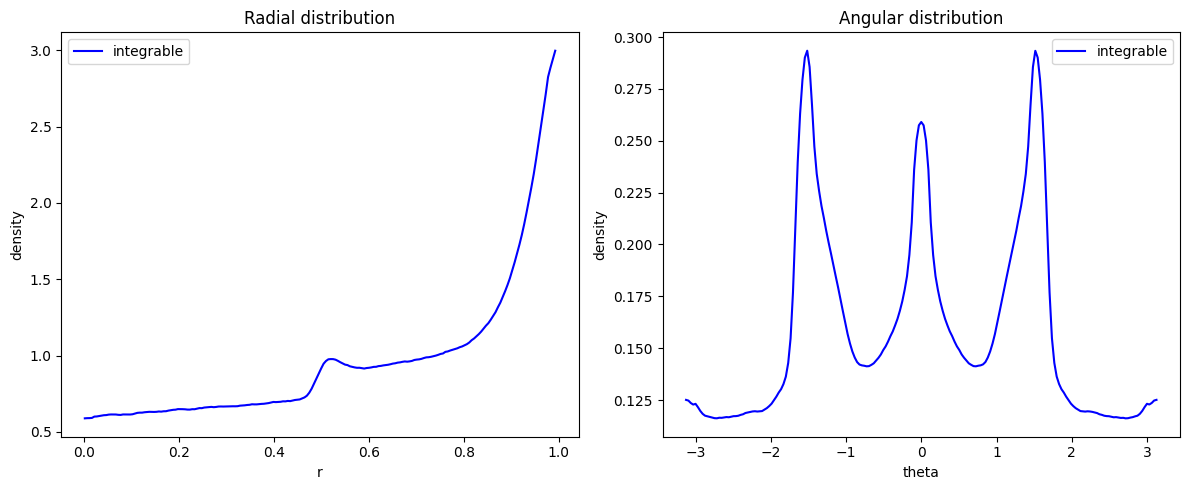

In [40]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(center_bins_r[:-1], hist_r_smooth, color='blue', label='integrable')
plt.xlabel('r')
plt.ylabel('density')
plt.title('Radial distribution')
plt.legend()
plt.subplot(122)
plt.plot(center_bins_a, hist_a_smooth, color='blue', label='integrable')
plt.xlabel('theta')
plt.ylabel('density')
plt.title('Angular distribution')
plt.legend()
plt.tight_layout()
#plt.savefig('figures/FF_marginals_integrable.png')


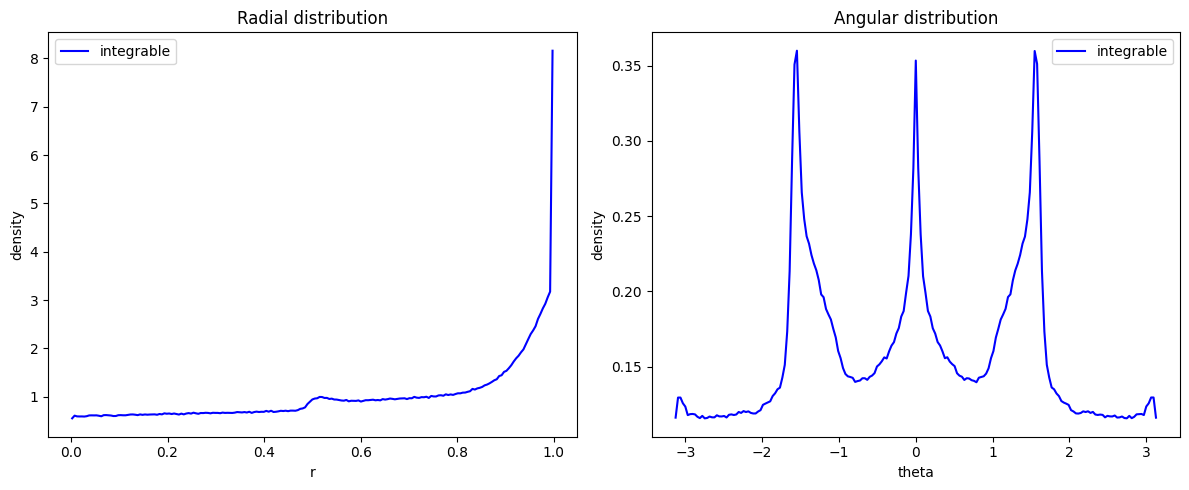

In [31]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(center_bins_r, hist_r, color='blue', label='integrable')
plt.xlabel('r')
plt.ylabel('density')
plt.title('Radial distribution')
plt.legend()
plt.subplot(122)
plt.plot(center_bins_a, hist_a, color='blue', label='integrable')
plt.xlabel('theta')
plt.ylabel('density')
plt.title('Angular distribution')
plt.legend()
plt.tight_layout()
#plt.savefig('figures/FF_marginals_integrable.png')


## Non-Integrable Unitary

In [32]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

n = 4
d = 2**n

reps = 100000

maps_nonintegrable_list, spectra_nonintegrable_list, csr_nonintegrable_list = sample_csr(n, reps, haar_random, 5)
csr_nonintegrable = Spectrum(csr_nonintegrable_list)
radial_nonintegrable_list = spectrum_to_radial(csr_nonintegrable_list)
angular_nonintegrable_list = spectrum_to_angular(csr_nonintegrable_list)

saver([radial_nonintegrable_list, angular_nonintegrable_list], 'data/AI_marginals_raw.pkl')


  0%|          | 0/100000 [00:00<?, ?it/s]

KeyboardInterrupt: 

### Radial and Angular

In [41]:
[radial_integrable_list, angular_integrable_list] = loader('data/AI_marginals_raw.large')
center_bins_r, hist_r, hist_err, _ = hist_ensamble(radial_integrable_list, bins=np.linspace(0, 1, 200))
center_bins_a, hist_a, hist_err, _ = hist_ensamble(angular_integrable_list, bins=np.linspace(-np.pi, np.pi, 200))

In [42]:
radial_AI_hist = np.array([center_bins_r, hist_r]).T
angular_AI_hist = np.array([center_bins_a, hist_a]).T

np.savetxt('bookkeeping/figure3/radial_AI_hist.txt', radial_AI_hist)
np.savetxt('bookkeeping/figure3/angular_AI_hist.txt', angular_AI_hist)

In [43]:
hist_r_smooth = moving_average(hist_r[:-1], 6)
hist_a_smooth = moving_average(hist_a, 6)

radial_AI_hist_smooth = np.array([center_bins_r[:-1], hist_r_smooth]).T
angular_AI_hist_smooth = np.array([center_bins_a, hist_a_smooth]).T

np.savetxt('bookkeeping/figure3/radial_AI_hist_smooth.txt', radial_AI_hist_smooth)
np.savetxt('bookkeeping/figure3/angular_AI_hist_smooth.txt', angular_AI_hist_smooth)

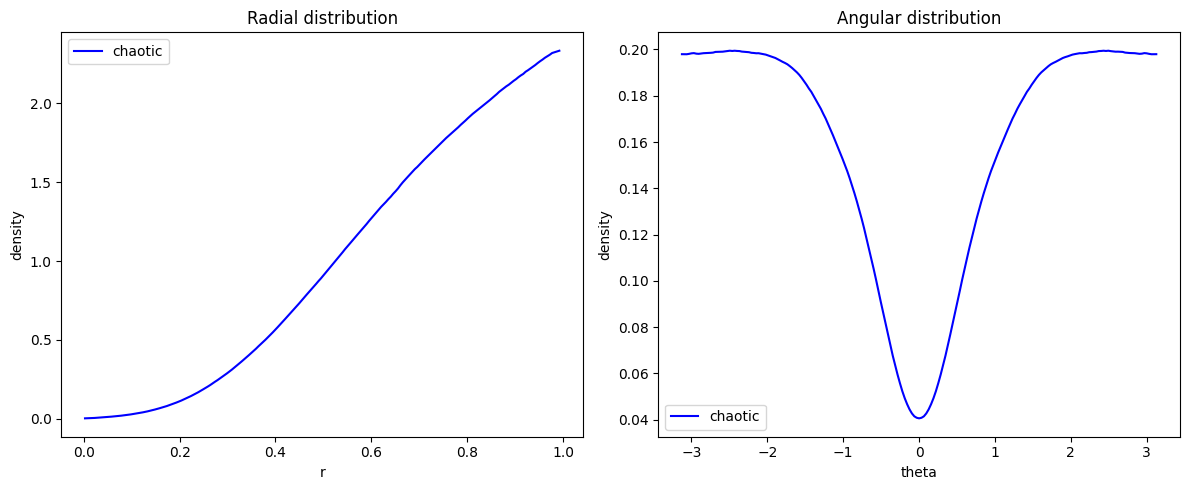

In [45]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(center_bins_r[:-1], hist_r_smooth, color='blue', label='chaotic')
plt.xlabel('r')
plt.ylabel('density')
plt.title('Radial distribution')
plt.legend()
plt.subplot(122)
plt.plot(center_bins_a, hist_a_smooth, color='blue', label='chaotic')
plt.xlabel('theta')
plt.ylabel('density')
plt.title('Angular distribution')
plt.legend()
plt.tight_layout()
#plt.savefig('figures/AI_marginals_integrable.png')
